## Importing the necessary Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#### Reading the dataset through Pandas

In [2]:
df = pd.read_excel('ShopSatisfactionSurveyData.xlsx')

#### Assigning the names of the columns in the Excel File

In [3]:
df.columns = ['H', 'gender', 'age', 'family_size', 'house', 'education', 'net_income', 'purchases', 'sat_product_range', 'sat_price_level']

df.head()

,H,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
0,1,1,34,4,1,4,2960.0,4.0,3,2
1,2,1,67,1,1,1,980.0,1.0,5,2
2,3,2,46,3,3,5,3500.0,4.0,2,4
3,4,1,22,2,2,3,860.0,1.0,5,3
4,5,2,30,5,2,4,3380.0,4.0,2,3


#### Removing the unnecessary columns from the dataset

In [4]:
df=df.drop(['H'], axis=1)

In [5]:
df.head()


,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level
0,1,34,4,1,4,2960.0,4.0,3,2
1,1,67,1,1,1,980.0,1.0,5,2
2,2,46,3,3,5,3500.0,4.0,2,4
3,1,22,2,2,3,860.0,1.0,5,3
4,2,30,5,2,4,3380.0,4.0,2,3


#### Categorizing according to the income range

In [6]:
bins = [500,1000,2000,3000,4000,5000,6000,7000]
df['income_range'] = pd.cut(df['net_income'], bins=bins)
df

,gender,age,family_size,house,education,net_income,purchases,sat_product_range,sat_price_level,income_range
0,1,34,4,1,4,2960.0,4.0,3,2,"(2000, 3000]"
1,1,67,1,1,1,980.0,1.0,5,2,"(500, 1000]"
2,2,46,3,3,5,3500.0,4.0,2,4,"(3000, 4000]"
3,1,22,2,2,3,860.0,1.0,5,3,"(500, 1000]"
4,2,30,5,2,4,3380.0,4.0,2,3,"(3000, 4000]"
...,...,...,...,...,...,...,...,...,...,...
97,1,38,1,2,4,1380.0,1.0,4,3,"(1000, 2000]"
98,1,56,2,2,1,1700.0,2.0,3,3,"(1000, 2000]"
99,1,42,5,1,5,4430.0,5.0,2,4,"(4000, 5000]"
100,2,36,1,2,1,1100.0,1.0,5,1,"(1000, 2000]"


In [7]:
df1=pd.crosstab(df['sat_product_range'], 'Count')
df1

col_0,Count
sat_product_range,
1,2
2,21
3,30
4,22
5,27


In [8]:
df2=pd.crosstab(df['sat_price_level'], 'Count')
df2

col_0,Count
sat_price_level,
1,12
2,25
3,43
4,20
5,2


In [9]:
df3 = pd.concat([df1,df2],axis=1)
df3.columns = ['sat_price_level', 'sat_product_range']
df3

,sat_price_level,sat_product_range
1,2,12
2,21,25
3,30,43
4,22,20
5,27,2


#### Percentage as per Price Level Satisfaction

In [10]:
df4 = pd.crosstab(df['sat_price_level'],'Count')
df4['Percentage_Price_Level'] = df4['Count']/df4['Count'].sum()*100
df4


col_0,Count,Percentage_Price_Level
sat_price_level,,
1,12,11.764706
2,25,24.509804
3,43,42.156863
4,20,19.607843
5,2,1.960784


#### Percentage as per Product Range Satisfaction

In [11]:
df5 = pd.crosstab(df['sat_product_range'],'Count')
df5['Percentage_Product_Range'] = df5['Count']/df4['Count'].sum()*100
df5

col_0,Count,Percentage_Product_Range
sat_product_range,,
1,2,1.960784
2,21,20.588235
3,30,29.411765
4,22,21.568627
5,27,26.470588


#### Analysis between Price Level and Product Range

In [12]:
df6 = pd.concat([df4,df5],axis=1)
df6.index = ['Very Satisfied', 'Satisfied', 'Neutral', 'UnSatisfied','Very UnSatisfied']
df6

col_0,Count,Percentage_Price_Level,Count,Percentage_Product_Range
Very Satisfied,12,11.764706,2,1.960784
Satisfied,25,24.509804,21,20.588235
Neutral,43,42.156863,30,29.411765
UnSatisfied,20,19.607843,22,21.568627
Very UnSatisfied,2,1.960784,27,26.470588


#### To drop the unnecessary columns

In [13]:
df7=df6.drop(['Count'], axis=1)
df7

col_0,Percentage_Price_Level,Percentage_Product_Range
Very Satisfied,11.764706,1.960784
Satisfied,24.509804,20.588235
Neutral,42.156863,29.411765
UnSatisfied,19.607843,21.568627
Very UnSatisfied,1.960784,26.470588


#### Graphical Representation

array([<AxesSubplot:ylabel='Percentage_Price_Level'>,
       <AxesSubplot:ylabel='Percentage_Product_Range'>], dtype=object)

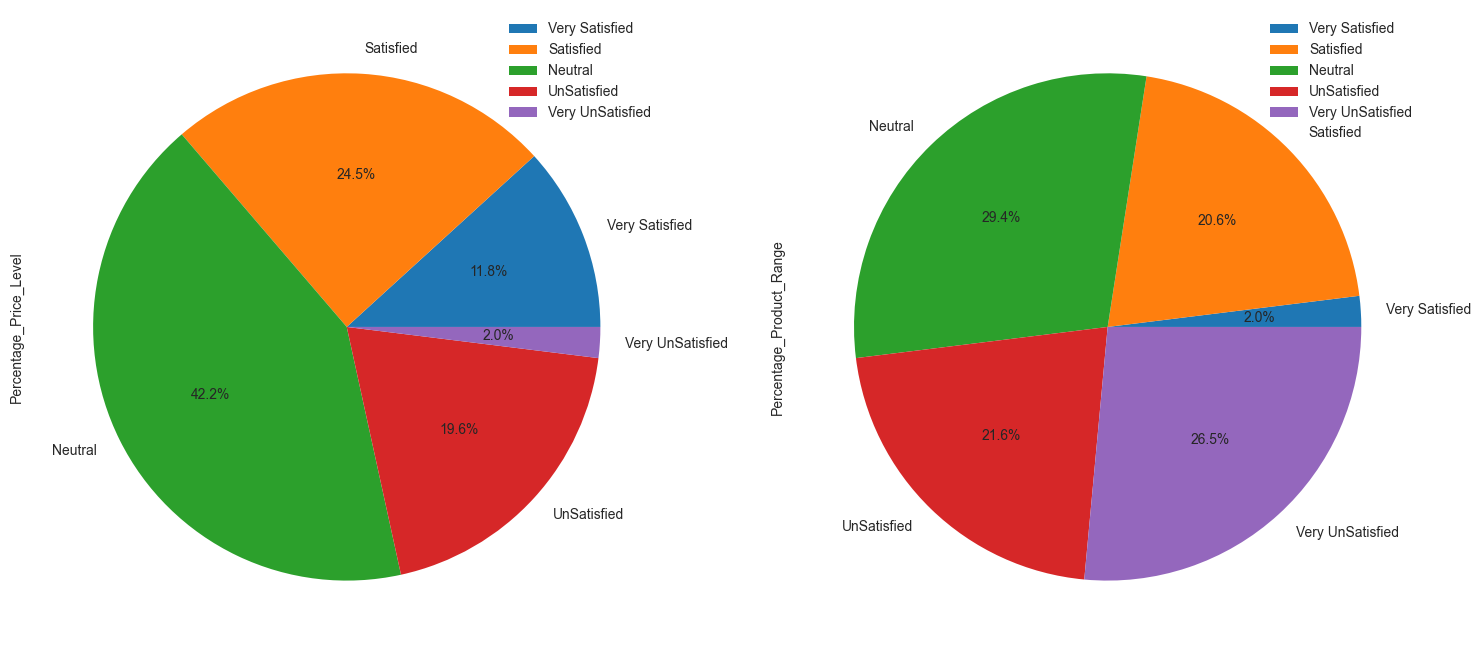

In [14]:
df7.plot.pie(subplots=True, autopct='%1.1f%%', figsize=(18, 9))

#### Analysis between Income Range and Satisfaction Price Level

In [15]:
df8 = pd.crosstab(df['sat_price_level'],df['income_range'])
df8

income_range,"(500, 1000]","(1000, 2000]","(2000, 3000]","(3000, 4000]","(4000, 5000]"
sat_price_level,,,,,
1,3,5,2,0,0
2,2,10,12,1,0
3,1,14,17,8,3
4,0,4,5,7,4
5,0,1,0,1,0


#### Graphical Representation

array([<AxesSubplot:ylabel='(500, 1000]'>,
       <AxesSubplot:ylabel='(1000, 2000]'>,
       <AxesSubplot:ylabel='(2000, 3000]'>,
       <AxesSubplot:ylabel='(3000, 4000]'>,
       <AxesSubplot:ylabel='(4000, 5000]'>], dtype=object)

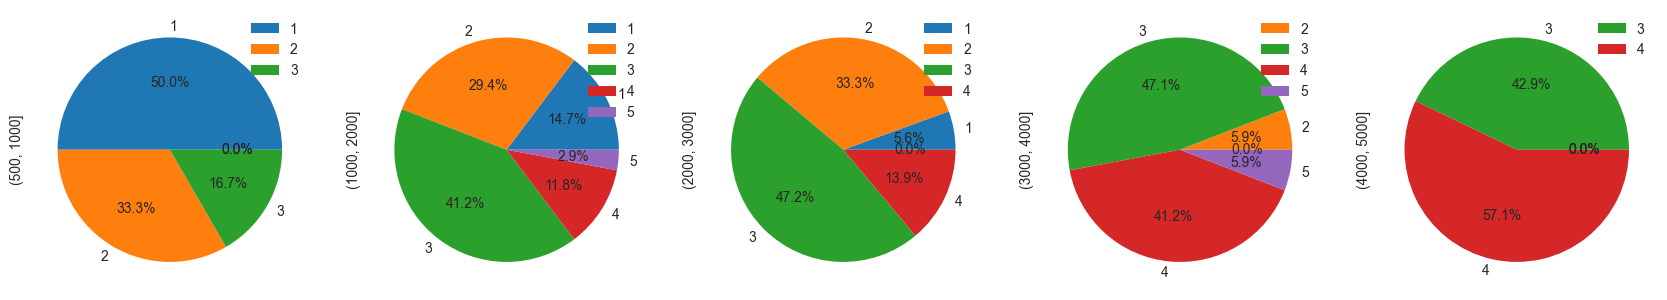

In [16]:
df8.plot.pie(subplots=True, autopct='%1.1f%%',figsize=(21, 5))

# Second Part of the Project - Chi square Testing

### Finding the Correlation
#### Income Range VS Price Satisafaction Level

In [17]:
from scipy.stats import chi2_contingency
chi2_contingency(df8)

(34.41628666970664,
 0.004772813332745463,
 16,
 array([[ 0.6 ,  3.4 ,  3.6 ,  1.7 ,  0.7 ],
        [ 1.5 ,  8.5 ,  9.  ,  4.25,  1.75],
        [ 2.58, 14.62, 15.48,  7.31,  3.01],
        [ 1.2 ,  6.8 ,  7.2 ,  3.4 ,  1.4 ],
        [ 0.12,  0.68,  0.72,  0.34,  0.14]]))

<AxesSubplot:xlabel='sat_price_level'>

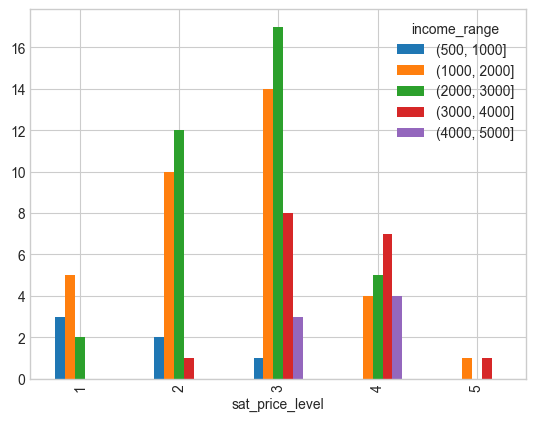

In [18]:
df8.plot.bar()

## Interpretation

Since the p-value is 0.0047 which shows that most of our customers are satisfied with the price range.

#### Analysis: Age VS Satisfaction Price Level 

In [19]:
df9 = df
age_bins = [20,30,40,50,60,70,80,90]
df['age_group'] = pd.cut(df['age'], bins=age_bins)
df9 = pd.crosstab(df9['sat_price_level'],df9['age_group'])
df9

age_group,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]"
sat_price_level,,,,,,
1,5,3,1,0,0,0
2,5,8,4,3,5,0
3,10,12,11,7,2,1
4,2,6,6,6,0,0
5,0,1,0,1,0,0


#### Graphical Representation

<AxesSubplot:xlabel='sat_price_level'>

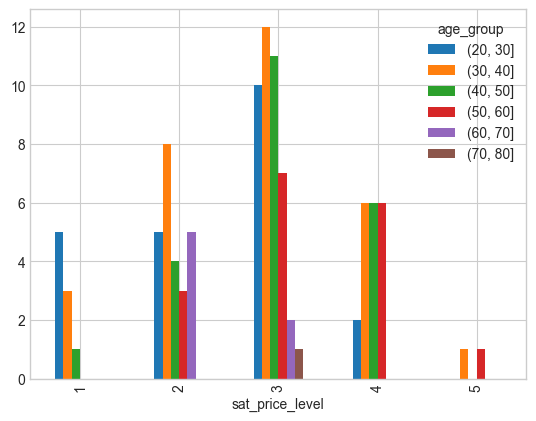

In [20]:
df9.plot.bar()

In [21]:
chi2_contingency(df9)

(23.78457025600938,
 0.25192928961394956,
 20,
 array([[ 2.        ,  2.72727273,  2.        ,  1.54545455,  0.63636364,
          0.09090909],
        [ 5.55555556,  7.57575758,  5.55555556,  4.29292929,  1.76767677,
          0.25252525],
        [ 9.55555556, 13.03030303,  9.55555556,  7.38383838,  3.04040404,
          0.43434343],
        [ 4.44444444,  6.06060606,  4.44444444,  3.43434343,  1.41414141,
          0.2020202 ],
        [ 0.44444444,  0.60606061,  0.44444444,  0.34343434,  0.14141414,
          0.02020202]]))

## Interpretation

Since the p-value is 0.25 which shows that the youngest customer is the most dissatisfied customer in the store.

### Analysis: Gender VS Satisfaction Product Range

In [22]:
df10 = df
gender_bins = [1, 2]
df['gender_group'] = pd.cut(df['gender'], bins=gender_bins)
df10 = pd.crosstab(df10['sat_product_range'],df10['gender'])
df10.columns = ['Woman', 'Man']
df10

,Woman,Man
sat_product_range,,
1,0,2
2,14,7
3,22,8
4,16,6
5,18,9


<AxesSubplot:xlabel='sat_product_range'>

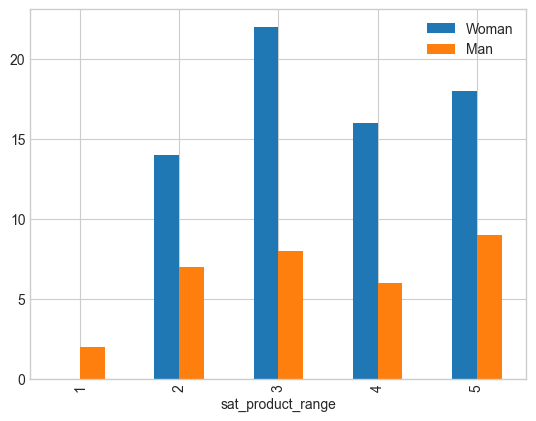

In [23]:
df10.plot.bar()

In [24]:
chi2_contingency(df10)

(4.941038961038961,
 0.2934009452510216,
 4,
 array([[ 1.37254902,  0.62745098],
        [14.41176471,  6.58823529],
        [20.58823529,  9.41176471],
        [15.09803922,  6.90196078],
        [18.52941176,  8.47058824]]))

## Interpretation

Since the p-value is 0.29 which shows that women are the most satisfied customers in the store.

#### Analysis: Income Range VS Product Range Satisafaction

In [25]:
df11 = df
df11 = pd.crosstab(df11['sat_product_range'],df11['income_range'])
df11

income_range,"(500, 1000]","(1000, 2000]","(2000, 3000]","(3000, 4000]","(4000, 5000]"
sat_product_range,,,,,
1,0,0,1,0,1
2,0,4,3,9,5
3,0,6,15,7,1
4,0,10,10,1,0
5,6,14,7,0,0


<AxesSubplot:xlabel='sat_product_range'>

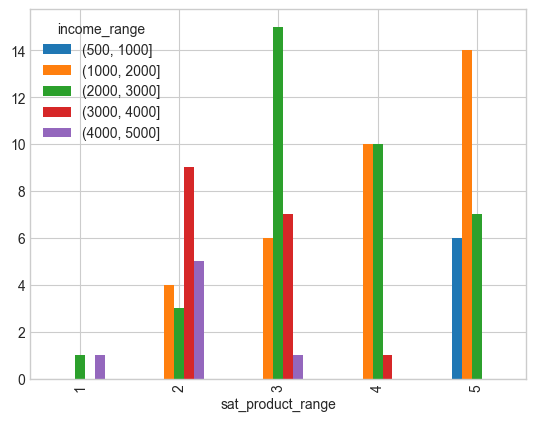

In [26]:
df11.plot.bar()

In [27]:
chi2_contingency(df11)

(63.42096012521654,
 1.3743953948148268e-07,
 16,
 array([[ 0.12,  0.68,  0.72,  0.34,  0.14],
        [ 1.26,  7.14,  7.56,  3.57,  1.47],
        [ 1.74,  9.86, 10.44,  4.93,  2.03],
        [ 1.26,  7.14,  7.56,  3.57,  1.47],
        [ 1.62,  9.18,  9.72,  4.59,  1.89]]))

## Interpretation

Since the p-value is 1.37e-07 which shows that most satisfied customers have income between 1000 to 2000